# Prática 1 — Librerías
### Importamos librerías
Primero importamos las librerías a utilizar: *numpy*, *pandas*, *matplotlib* y *skicit*.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Importación de dataset
Importamos el dataset a utilizar, en este caso la base de datos de **cáncer de mama de Wisconsin** proporcionado por *skicit*.
Mostramos algunos de los atributos del dataset, como pueden ser *radius*, *texture*, *perimeter*, *area* and *smoothness* junto al *target* (benigno o maligno).

In [9]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

df['target'] = breast_cancer.target
data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

data[features]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


## Numpy

In [10]:
# Veamos qué columnas tiene nuestro dataset
print(breast_cancer.feature_names, "\n")

mean_radius = np.array(df["mean radius"])
print("Existen ", mean_radius.shape, "muestras")

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Existen  (569,) muestras


In [11]:
# Media, mediana, desviación típica
print("Media: ", np.mean(mean_radius))
print("Mediana: ", np.median(mean_radius))
print("Desviación típica", np.std(mean_radius))

Media:  14.127291739894552
Mediana:  13.37
Desviación típica 3.520950760711062


### Matplotlib

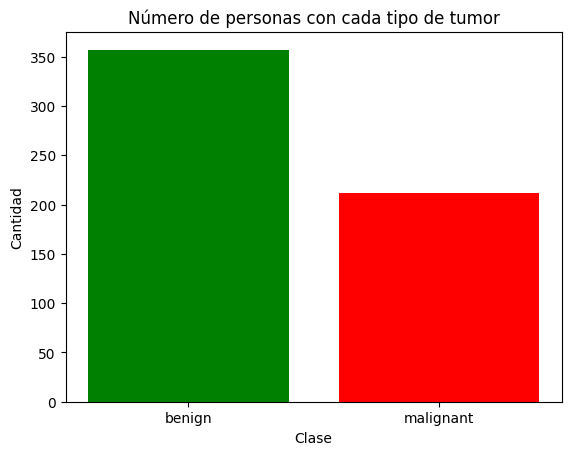

In [12]:
# Gráfico de barras de las clases
counts = df['target'].value_counts()
labels = [breast_cancer.target_names[i] for i in counts.index]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Número de personas con cada tipo de tumor')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()


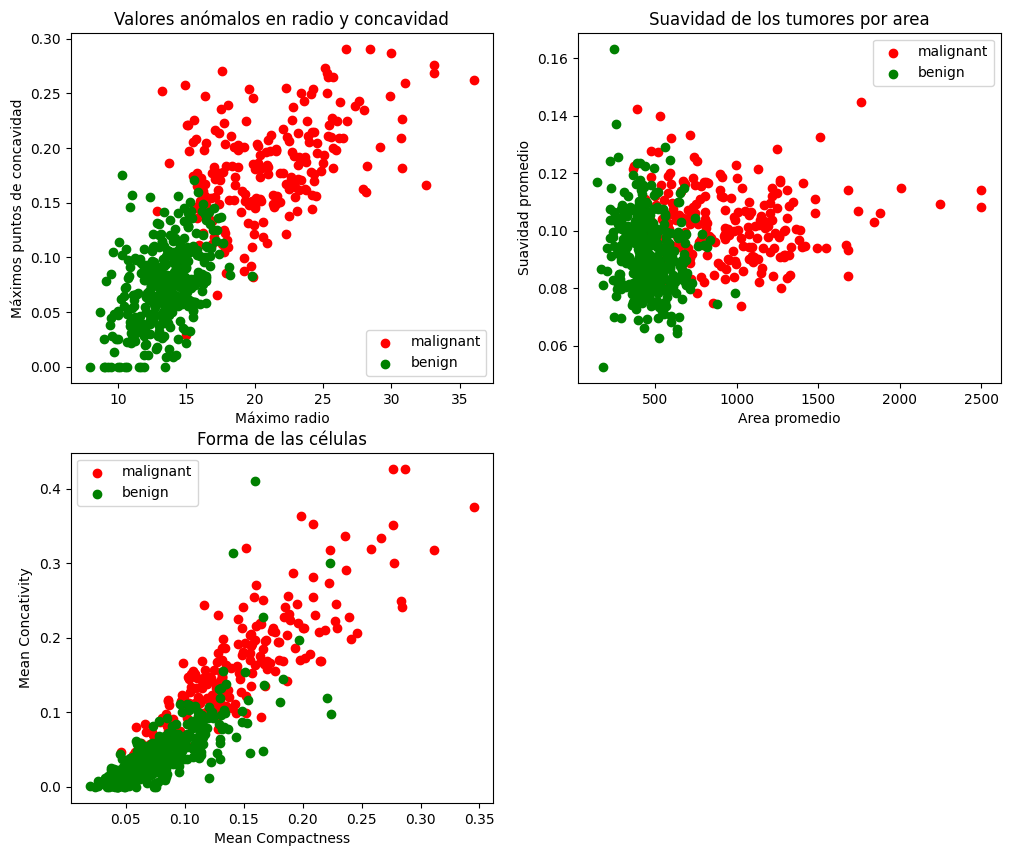

In [13]:
# Vamos a mostrar diferentes características del dataset en comparación unas con otras, para extraer conclusiones 
colors = ['red', 'green']

# Relación suavidad - textura: Si los valores máximos de radio y concavidad detectados en un paciente, son altos, es muy probable que el tumor sea maligno

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
for i in range(2):
    plt.scatter(df[df['target'] == i]['worst radius'],
                df[df['target'] == i]['worst concave points'],
                label=breast_cancer.target_names[i], color=colors[i])
plt.xlabel('Máximo radio')
plt.ylabel('Máximos puntos de concavidad')
plt.title('Valores anómalos en radio y concavidad')
plt.legend()


# Relación area - suavidad: los tumores con mayor area, suelen ser malignos, mientras que la suavidad no influye tanto en la decisión
plt.subplot(2,2,2)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean area'],
                df[df['target'] == i]['mean smoothness'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Area promedio')
plt.ylabel('Suavidad promedio')
plt.title('Suavidad de los tumores por area')
plt.legend()

# Relación compactness - concativity: los tumores con una compacidad y concavidad media más alta, suelen ser malignos
plt.subplot(2,2,3)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean compactness'],
                df[df['target'] == i]['mean concavity'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concativity')
plt.title('Forma de las células')
plt.legend()

plt.show()

Otra forma de analizar características de los datos es con el gráfico de barras, con la que podemos comparar varias características a la vez.

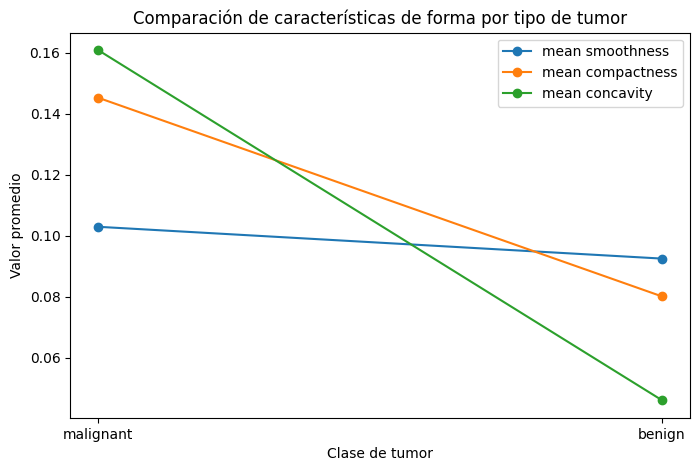

In [ ]:
# Gráfico de líneas

# Seleccionamos características de escala similar
cols = ['mean smoothness', 'mean compactness', 'mean concavity']
grouped_means = df.groupby('target')[cols].mean()
labels = breast_cancer.target_names

plt.figure(figsize=(8, 5))
for col in cols:
    plt.plot(labels, grouped_means[col], marker='o', label=col)

plt.title('Comparación de características de forma por tipo de tumor')
plt.ylabel('Valor promedio')
plt.xlabel('Clase de tumor')
plt.legend()
plt.show()

Podemos observar las mismas conclusiones que con los gráficos de puntos, y es que los tumores malignos suelen presentar valores medios de compacidad y concavidad mucho más altos que lso benignos, mientras que en cuanto a la suavidad, solo es ligeramente superior en los malignos.